In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data from the provided file
df=pd.read_csv("storedata.csv")

#analyse & visualize
df.reset_index(drop=True)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


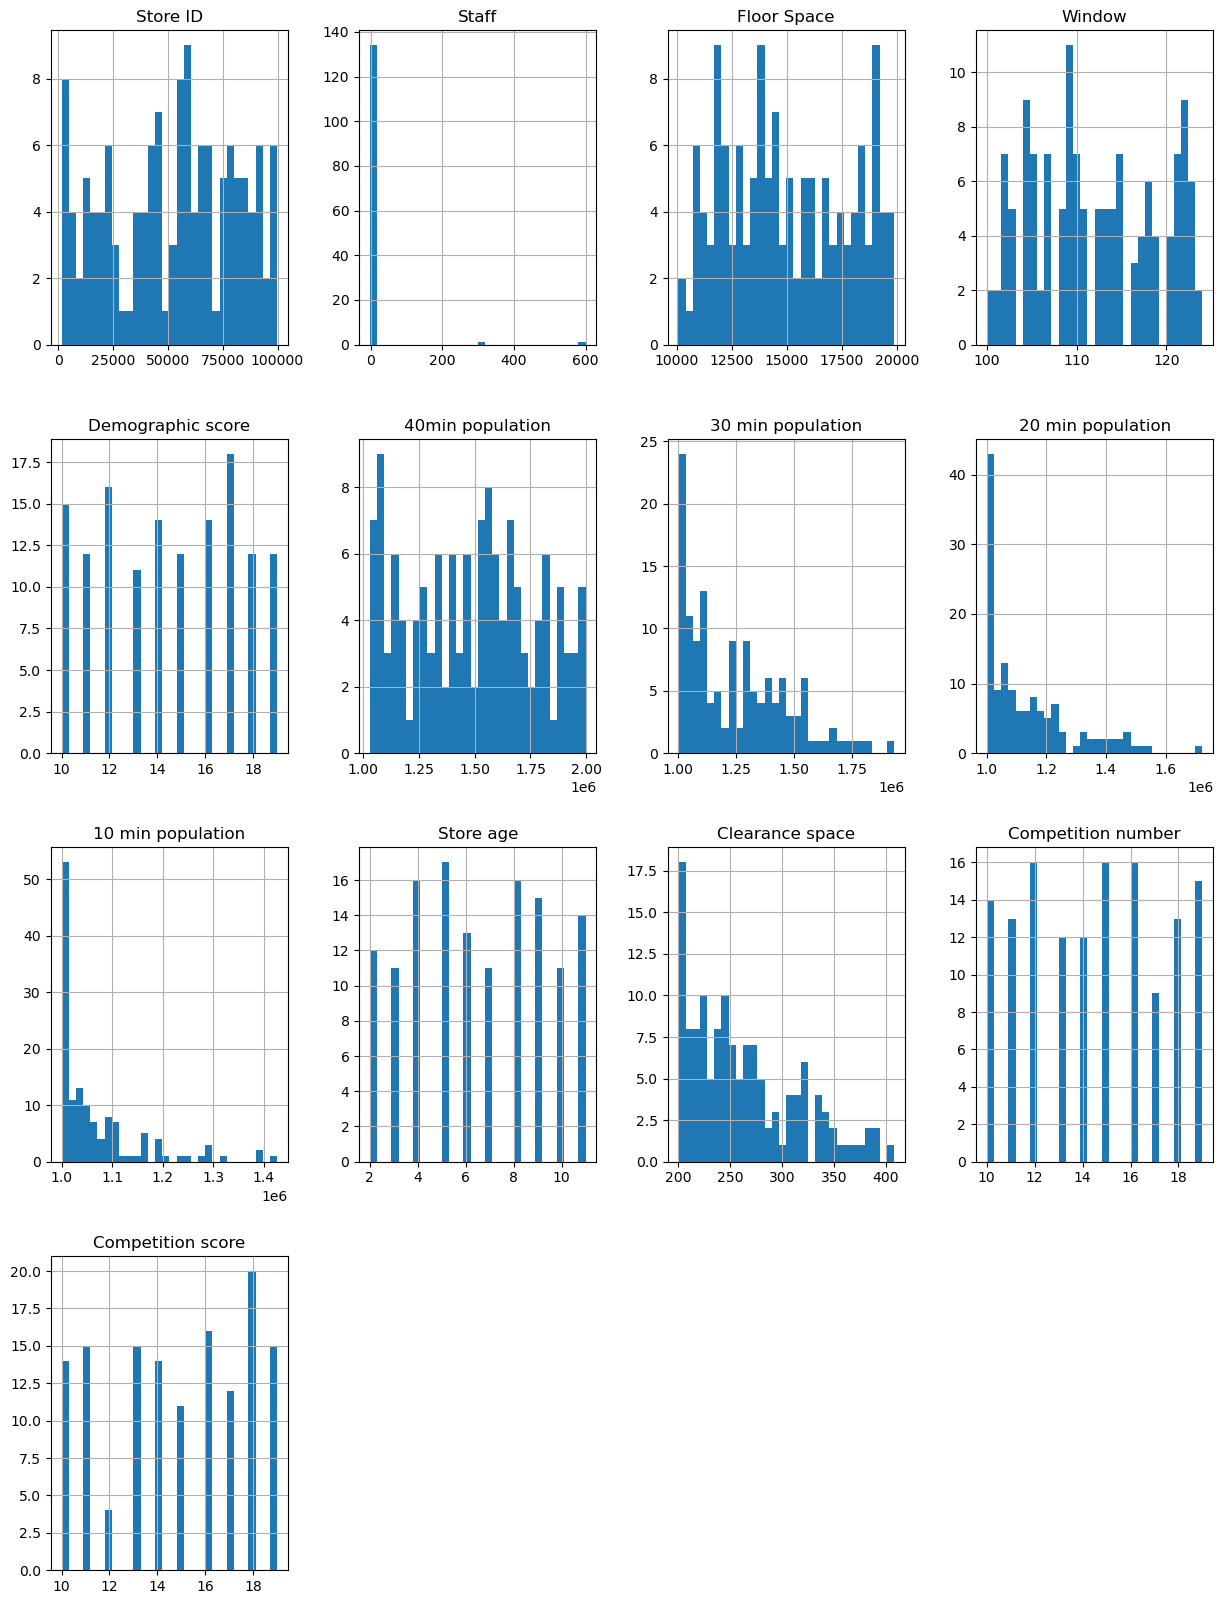

Town


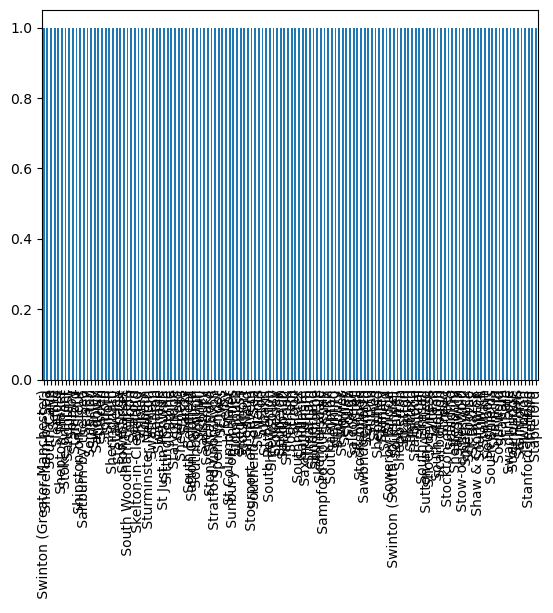

Country


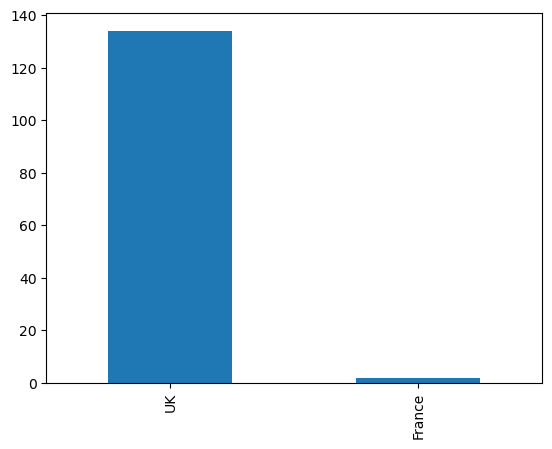

Manager name


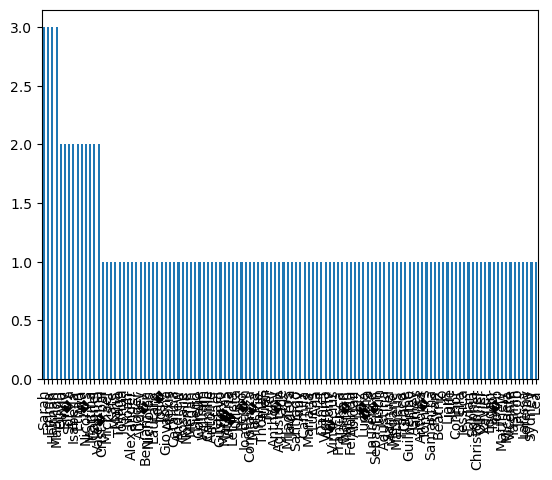

Car park


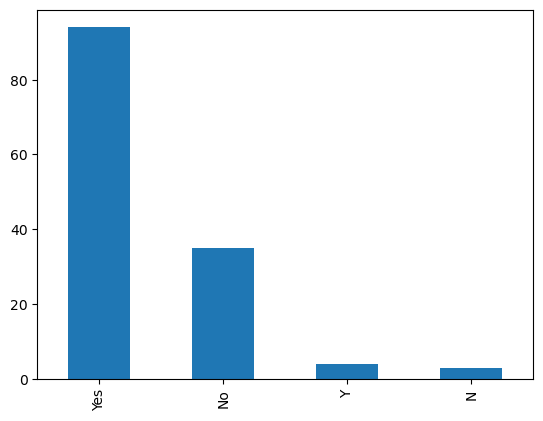

Location


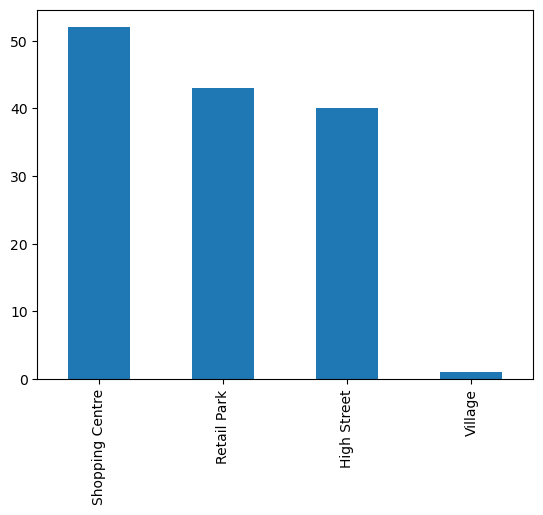

Performance


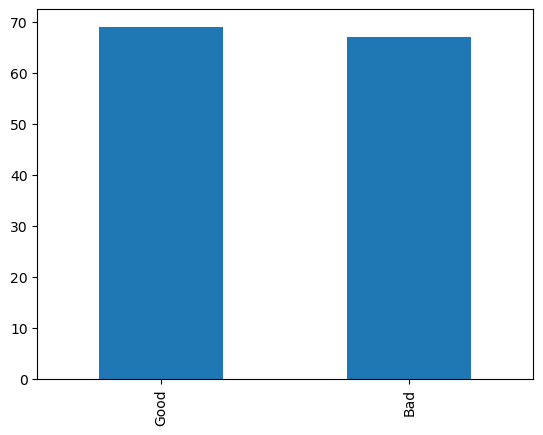

In [28]:
# show the histograms of each variable
df.hist(figsize = (15,20), bins=30)
df['Town'].value_counts().plot(kind='bar')
plt.show()
for col in df.select_dtypes(include=object).columns: 
    print(col)
    df[col].value_counts().plot(kind='bar')
    # display the plot
    plt.show()

__Non-numeric cells missing: Town, Country, Manager, Car Park, Location, Performance__


## Split the Data into train/test split

In [29]:
# Copy the data set to another variable
df_cleaned = df.copy()

In [30]:
#Setting the features and the target to X, y
targetName="Performance"
featureNames=df_cleaned.columns[df_cleaned.columns != targetName]
X = df_cleaned[featureNames]
y = df_cleaned[targetName]

In [31]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=550)

## Data Cleaning on Training and Test Data


In [32]:
# Recombine the data set so that when we clean and preprocess the data, the features and targets are in sync
X_train['Performance'] = y_train
X_test['Performance'] = y_test
# Reset the indeces to keep order
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [33]:
# choose the rows we want to keep from the raw data by analysing the histograms.
# Country has too little examples of France, Location has too little examples of Village
X_train = X_train[(X_train.Country=="UK") & (X_train.Location!="Village")]
X_test = X_test[(X_test.Country=="UK") & (X_test.Location!="Village")]

In [34]:
# reset the indeces to keep order in the training data.
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [35]:
# remapping the Car park data to change the "Y" and "N" values into Yes and No.
X_train['Car park'] = X_train['Car park'].replace({'Y':'Yes','N':'No'})
X_test['Car park'] = X_test['Car park'].replace({'Y':'Yes','N':'No'})

In [36]:
#taking out outliers from the Staff data set based on histogram
X_train = X_train[(X_train.Staff>0) & (X_train.Staff<10)]
X_test = X_test[(X_test.Staff>0) & (X_test.Staff<10)]

In [37]:
#Reset the indeces to keep order
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

__Store ID is not that relevant because the store ID is too unique to be a guide on performance. The Country has been cleaned to only be UK based stores so this is not useful either to determine performance. The Manger name is filled with many unique names with a few people running more than 1 store so I believe it is not a useful metric when determining a store's performance. The Town names are not necessary when we have the population distances, because of this I chose to omit the town names from the selected features.__

In [39]:
#Removing the features that are not going to be used to train data mentioned above
selected_features = ['Staff','Floor Space','Window','Car park',
                     'Demographic score','Location','40min population',
                     '30 min population','20 min population','10 min population',
                     'Store age','Clearance space','Competition number',
                     'Competition score']

# remapping the targets back to their respective variables after cleaning
y_train = X_train['Performance']
y_test = X_test['Performance']
# Reset the indeces of the data to keep order
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [40]:
# update the dataframe to only include the selected features to keep
X_train = X_train[selected_features]
X_test = X_test[selected_features]
# reset & display
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [41]:
#Encode the training and testing variables using one hot encoding
X_train = pd.get_dummies(X_train, prefix_sep='_', drop_first=True)
X_test = pd.get_dummies(X_test, prefix_sep='_', drop_first=True)
y_train = pd.get_dummies(y_train, prefix_sep='_', drop_first=True)
y_test = pd.get_dummies(y_test, prefix_sep='_', drop_first=True)
#check the encoded variables, reset and display
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Preprocessing the data

In [42]:
#Normalise the numerical features using the min max scaler (make every numeric value fall between 0-1)
from sklearn.preprocessing import MinMaxScaler
numerical_features=['Staff', 'Floor Space', 'Window', 'Demographic score','40min population',
                     '30 min population','20 min population','10 min population',
                     'Store age','Clearance space','Competition number',
                     'Competition score']
mm_scaler = MinMaxScaler()
X_train[numerical_features] = pd.DataFrame(mm_scaler.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test[numerical_features] = pd.DataFrame(mm_scaler.fit_transform(X_test[numerical_features]), columns=numerical_features)

In [43]:
#import grid search CV to use it on each model
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [44]:
# import log regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
# make array of hyperparameters to test
params = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'penalty':['l2'], 'max_iter':[100, 250, 500, 750, 1000], 'multi_class':['auto', 'ovr', 'multinomial']}
# use grid search to test for the best cv score given the hyperparameters# using the results of the grid search cv, define the model to the best parameters
gscv = GridSearchCV(logreg_model, params)
gscv.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 250, 500, 750, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']})

In [45]:
# print out a dict of best parameter values
gscv.best_params_

{'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

In [46]:
# print out the cv score
gscv.best_score_

0.7578947368421052

In [47]:
# using the results of the grid search cv, define the model to the best parameters
logreg_model = LogisticRegression(max_iter=100, multi_class='auto', penalty='l2', solver='lbfgs')

In [48]:
# fit the model to the training data
logreg_model.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [49]:
# import cross validation function
from sklearn.model_selection import cross_val_score

# Now, compute scores for the 5 folds (this makes 5 seperate models, and tests them 
# each on a different 0.2 of the data set- returning a list of these scores).
cv_scores = cross_val_score(logreg_model, X_train, np.ravel(y_train), cv=5)
# print each cv score from 5 folds
for i in cv_scores:
    print('cv score: ', i)
# print the mean of the list of scores
print("cv_scores mean: {}".format(np.mean(cv_scores)))

cv score:  0.7894736842105263
cv score:  0.6111111111111112
cv score:  0.8333333333333334
cv score:  0.7777777777777778
cv score:  0.7777777777777778
cv_scores mean: 0.7578947368421052


## Decision Tree

In [50]:
# import decision tree from sklearn
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
# make array of hyperparameters to test
params = {'criterion':['gini', 'entropy'], 'max_depth':[2,5,10,25,50,75,100], 'min_samples_leaf':[1,2,3,4,5,10]}
# use grid search to test for the best cv score given the hyperparameters
gscv = GridSearchCV(tree_clf, params)
gscv.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 25, 50, 75, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10]})

In [51]:
# print out a dict of best combination of hyperparameters values
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 10}

In [52]:
# print out the cv score of the best hyperparameters
gscv.best_score_

0.6807017543859649

In [53]:
# using the results of the grid search cv, define the model to the best hyperparameters
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [54]:
# fit the model to the training data
tree_clf = tree_clf.fit(X_train, y_train)

In [55]:
# Compute scores for the 5 folds (this makes 5 seperate models, and tests them 
# each on a different 0.2 of the data set- returning a list of these scores).
cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
for i in cv_scores:
    print('cv score: ', i)
# print the mean of the list of scores
print("cv_scores mean: {}".format(np.mean(cv_scores)))

cv score:  0.7368421052631579
cv score:  0.4444444444444444
cv score:  0.7222222222222222
cv score:  0.8333333333333334
cv score:  0.6666666666666666
cv_scores mean: 0.6807017543859649


## Neural Network

In [56]:
# import the neural network model MLPClassifier, create the model and fit it
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
# make array of hyperparameters to test
params = {'solver':['lbfgs', 'sgd','adam'], 'learning_rate':['constant', 'invscaling', 'adaptive'], 'max_iter':[200, 500, 750, 1000], 'hidden_layer_sizes':[(50,),(25,),(50, 50, 50), (50, 50, 50, 50), (50, 50, 50, 50, 50),(25, 25, 25), (25, 25, 25, 25), (25, 25, 25, 25, 25)]}
# use grid search to test for the best cv score given the hyperparameters
gscv = GridSearchCV(mlp_model, params)
gscv.fit(X_train, np.ravel(y_train))

c:\Users\rodol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rodol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rodol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rodol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rodol\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(50,), (25,), (50, 50, 50),
                                                (50, 50, 50, 50),
                                                (50, 50, 50, 50, 50),
                                                (25, 25, 25), (25, 25, 25, 25),
                                                (25, 25, 25, 25, 25)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [200, 500, 750, 1000],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [57]:
# print out a dict of best parameter values
gscv.best_params_

{'hidden_layer_sizes': (25, 25, 25),
 'learning_rate': 'invscaling',
 'max_iter': 1000,
 'solver': 'lbfgs'}

In [58]:
# print out the cv score
gscv.best_score_

0.7807017543859649

In [59]:
# using the results from the grid search cv, define the model with the best hyperparameters 
mlp_model = MLPClassifier(hidden_layer_sizes=(50,50,50,50), learning_rate='invscaling', max_iter=500, solver='adam')

In [60]:
# fit the model to the training data
mlp_model = mlp_model.fit(X_train, np.ravel(y_train))

In [61]:
# find the cv score for this model
# Compute scores for the 5 folds (this makes 5 seperate models, and tests them 
# each on a different 0.2 of the data set- returning a list of these scores).
cv_scores = cross_val_score(mlp_model, X_train, np.ravel(y_train), cv=5)
# print each cv score from 5 folds
for i in cv_scores:
    print('cv score: ', i)
# print the mean of the list of scores
print("cv_scores mean: {}".format(np.mean(cv_scores)))

cv score:  0.8421052631578947
cv score:  0.7222222222222222
cv score:  0.8888888888888888
cv score:  0.7222222222222222
cv score:  0.6111111111111112
cv_scores mean: 0.7573099415204678


## Test data on Final model and the Confusion Matrix

In [62]:
# #find the accuracy of the chosen best model (Neural Network) on the test data 
from sklearn.metrics import accuracy_score
y_pred = mlp_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', test_accuracy)

Accuracy Score:  0.7692307692307693


In [63]:
# find the Mean Square Error for the model on the test data (Low MSE is good)
from sklearn.metrics import mean_squared_error
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.23076923076923078


In [64]:
# find the R-squared value for the model on the test data (High R-squared is good)
from sklearn.metrics import r2_score
print('R-squared: ', r2_score(y_test, y_pred))

R-squared:  0.06149732620320858


In [65]:
# print out the confusion matrix of the model on the test data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12,  5],
       [ 4, 18]], dtype=int64)